In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
import scipy.stats
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML
from brian2.units import *

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
data = np.load("D:/Work/Neurogenesis-PhD/simulation_statistics/batch_analysis_131801_27112017.npz")
print data['recording_archive_name']

..\synaptogenesis\case3_bx_tminusx\case3_b1.4_tminus90.npz


In [3]:
snapshots = data['snapshots']
params = data['params']
dt = np.dtype([('rate', 'float'), 
               ('number_ff_synapses', 'float'), 
               ('final_weight_proportion', 'float'), 
               ('init_mean_std', 'float'),
               ('fin_mean_std_conn_shuf', 'float'),
               ('fin_mean_std_conn', 'float'),
               ('wsr_sigma_fin_conn_fin_conn_shuffle', 'float'),
               ('fin_mean_std_weight_shuf', 'float'),
               ('fin_mean_std_weight', 'float'),
               ('wsr_sigma_fin_weight_fin_weight_shuffle', 'float'),
               ('init_mean_AD', 'float'),
               ('fin_mean_AD_conn_shuf', 'float'),
               ('fin_mean_AD_conn', 'float'),
               ('wsr_AD_fin_conn_fin_conn_shuffle', 'float'),
               ('fin_mean_AD_weight_shuf', 'float'),
               ('fin_mean_AD_weight', 'float'),
               ('wsr_AD_fin_weight_fin_weight_shuffle', 'float'),
#                ('file_path', 'S59')
              ])
results = np.array(data['results'][:, :-1], dtype=dt)

In [4]:
results.shape

(160L, 17L)

In [5]:
params.shape

(160L, 2L)

In [6]:
all_names = np.asarray(results.dtype.names)

In [7]:
results.dtype.names

('rate',
 'number_ff_synapses',
 'final_weight_proportion',
 'init_mean_std',
 'fin_mean_std_conn_shuf',
 'fin_mean_std_conn',
 'wsr_sigma_fin_conn_fin_conn_shuffle',
 'fin_mean_std_weight_shuf',
 'fin_mean_std_weight',
 'wsr_sigma_fin_weight_fin_weight_shuffle',
 'init_mean_AD',
 'fin_mean_AD_conn_shuf',
 'fin_mean_AD_conn',
 'wsr_AD_fin_conn_fin_conn_shuffle',
 'fin_mean_AD_weight_shuf',
 'fin_mean_AD_weight',
 'wsr_AD_fin_weight_fin_weight_shuffle')

In [8]:
interesting_names = all_names[np.where(['init' not in name and 'wsr' not in name for name in all_names])]
interesting_names_indices = np.where(['init' not in name and 'wsr' not in name for name in all_names])[0]
print interesting_names
print interesting_names.shape
print [interesting_names[0]]
print results[interesting_names[0]].shape
print results['rate'].shape
print results['rate'].size

['rate' 'number_ff_synapses' 'final_weight_proportion'
 'fin_mean_std_conn_shuf' 'fin_mean_std_conn' 'fin_mean_std_weight_shuf'
 'fin_mean_std_weight' 'fin_mean_AD_conn_shuf' 'fin_mean_AD_conn'
 'fin_mean_AD_weight_shuf' 'fin_mean_AD_weight']
(11L,)
['rate']
(160L, 17L)
(160L, 17L)
2720


In [9]:
correlation = scipy.stats.spearmanr(results[:, interesting_names_indices])

WARNING    C:\WinPython-64bit-2.7.9.4\python-2.7.9.amd64\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
 [py.warnings]
  "values. nan values will be ignored.", RuntimeWarning)



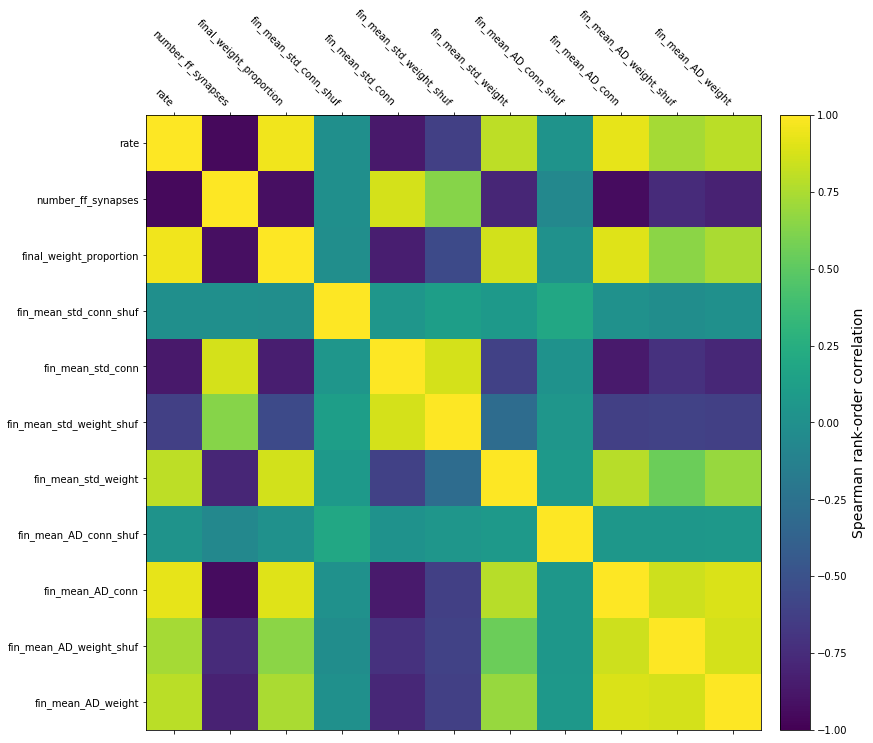

In [10]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(12,12))
i = ax1.matshow(correlation.correlation, vmin=-1, vmax=1)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
# ax1.set_xlabel("Neuron X coordinate")
# ax1.set_ylabel("Neuron Y coordinate")
ax1.set_xticks(range(interesting_names.size))
ax1.set_xticklabels(interesting_names, rotation='-45', ha='right')
ax1.set_yticks(range(interesting_names.size))
ax1.set_yticklabels(interesting_names, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Spearman rank-order correlation", fontsize=14)
plt.tight_layout(.3)
f.savefig('result_matrix_correlations.png')

In [11]:
wsr_correlation = scipy.stats.wilcoxon(results[:, interesting_names_indices])

WARNING    C:\WinPython-64bit-2.7.9.4\python-2.7.9.amd64\lib\site-packages\scipy\stats\morestats.py:2393: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  d = compress(np.not_equal(d, 0), d, axis=-1)
 [py.warnings]
  d = compress(np.not_equal(d, 0), d, axis=-1)



ValueError: condition must be a 1-d array

In [12]:
# Fine, but how do my parameters covary with all of the results?
# append these parameters of interest to the results matrix(?)

In [13]:
params[:,1].size

160

In [14]:
# forgot to record tau_minus (t_minus) -- Good job!
for index in xrange(params[:,1].size):
    params[:,0][index]['t_minus'] = int(params[:,1][index][:-4].split('_')[-1][len('tminus'):])

In [15]:
params_of_interest = ['b', 't_minus']
set_of_poi = np.ones((results.shape[0], len(params_of_interest))) * np.nan
for index, param_set in np.ndenumerate(params[:,0]):
    for poi in range(len(params_of_interest)):
        set_of_poi[index[0], poi] = param_set[params_of_interest[poi]]

In [16]:
results_with_poi = np.concatenate((np.asarray(results[:, interesting_names_indices], dtype=float), set_of_poi), axis=1)

In [17]:
correlation_with_poi = scipy.stats.spearmanr(results_with_poi)

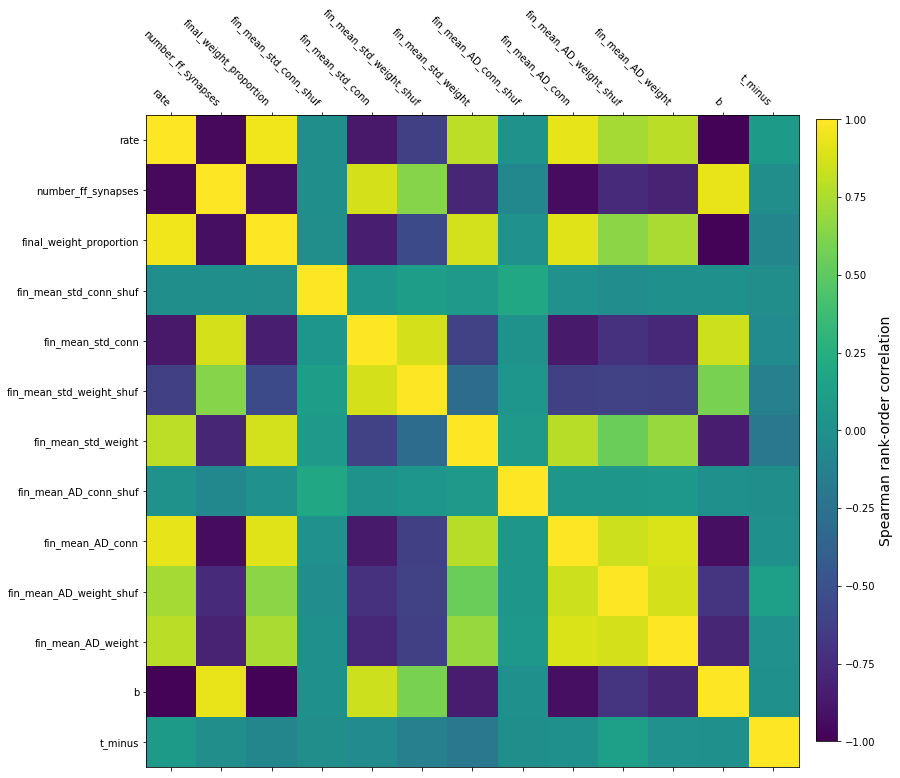

In [18]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(12,12))
i = ax1.matshow(correlation_with_poi.correlation, vmin=-1, vmax=1)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
# ax1.set_xlabel("Neuron X coordinate")
# ax1.set_ylabel("Neuron Y coordinate")
ax1.set_xticks(range(results_with_poi.shape[1]))
ax1.set_xticklabels(interesting_names.tolist() + params_of_interest, rotation='-45', ha='right')
ax1.set_yticks(range(results_with_poi.shape[1]))
ax1.set_yticklabels(interesting_names.tolist() + params_of_interest, ha='right')
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Spearman rank-order correlation", fontsize=14)
f.savefig('result_matrix_w_params_correlations.png')

In [19]:
correlation_with_poi_v2 = scipy.stats.spearmanr(results[:, interesting_names_indices], set_of_poi)

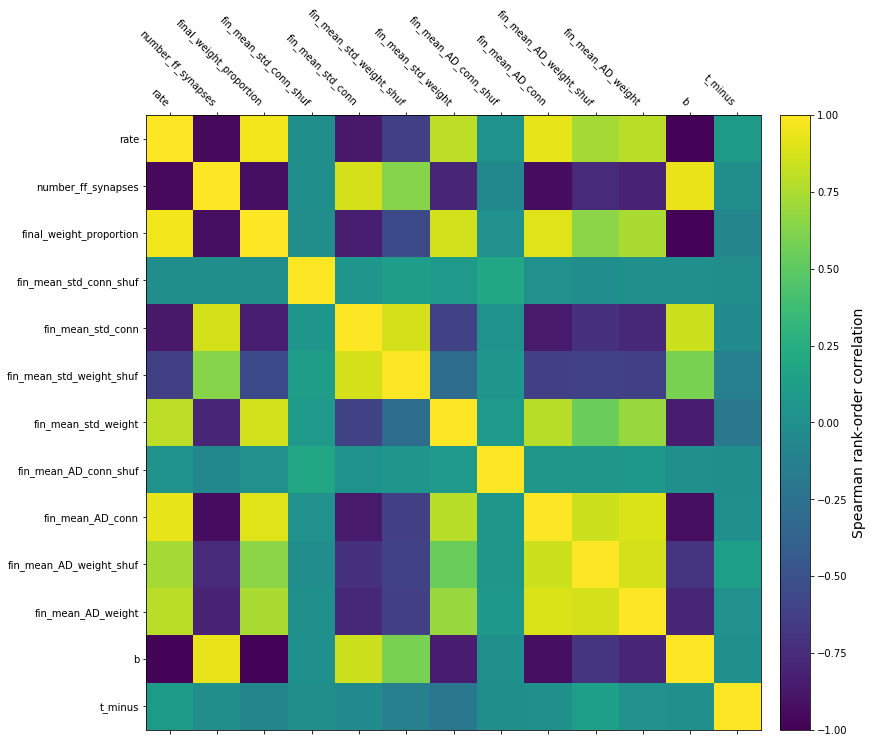

In [22]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(12,12))
i = ax1.matshow(correlation_with_poi_v2.correlation, vmin=-1, vmax=1)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
# ax1.set_xlabel("Neuron X coordinate")
# ax1.set_ylabel("Neuron Y coordinate")
ax1.set_xticks(range(results_with_poi.shape[1]))
ax1.set_xticklabels(interesting_names.tolist() + params_of_interest, rotation='-45', ha='right')
ax1.set_yticks(range(results_with_poi.shape[1]))
ax1.set_yticklabels(interesting_names.tolist() + params_of_interest, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Spearman rank-order correlation", fontsize=14)
plt.tight_layout(.3)
f.savefig('result_matrix_w_params_correlations_v2.png')

In [23]:
np.min(set_of_poi[:, 0])

0.65000000000000002

In [24]:
# let's generate the map from b and t_minus

min_b = int(np.min(set_of_poi[:, 0])*100)
max_b = int(np.max(set_of_poi[:, 0])*100)
min_t_minus = int(np.min(set_of_poi[:, 1])//10)
max_t_minus = int(np.max(set_of_poi[:, 1])//10)


In [25]:
min_b

65

In [26]:
np.arange(1.4, 0.6, -0.05)[::-1]

array([ 0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,  0.95,  1.  ,  1.05,
        1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,  1.35,  1.4 ])

In [27]:
fin_mean_std_weight_variation = np.ones((np.arange(1.4, 0.6, -0.05).size, np.arange(100, 0, -10).size)) * np.nan
for index in xrange(results_with_poi.shape[0]):
    std_weight = results_with_poi[index, 6]
    _b = results_with_poi[index, -2]
    _t_minus = results_with_poi[index, -1]
#     print _t_minus, int(_t_minus//10) - min_t_minus
#     print _b, (int(_b*100)-min_b) /5
    if np.isfinite(fin_mean_std_weight_variation[(int(_b*100)-min_b) /5, int(_t_minus//10) - min_t_minus]):
        print _b, (int(_b*100)-min_b) /5
        print _t_minus, int(_t_minus//10) - min_t_minus
        print fin_mean_std_weight_variation[(int(_b*100)-min_b) /5+1, int(_t_minus//10) - min_t_minus]
        print std_weight
        fin_mean_std_weight_variation[(int(_b*100)-min_b) //5+1, int(_t_minus//10) - min_t_minus] =  std_weight
    else:
        fin_mean_std_weight_variation[(int(_b*100)-min_b) //5, int(_t_minus//10) - min_t_minus] =  std_weight

1.1 9
10.0 0
nan
2.28157986329
1.1 9
100.0 9
nan
2.1265605786
1.1 9
20.0 1
nan
2.23303162528
1.1 9
30.0 2
nan
2.23722229984
1.1 9
40.0 3
nan
2.20142166238
1.1 9
50.0 4
nan
2.20843450589
1.1 9
60.0 5
nan
2.15028572189
1.1 9
70.0 6
nan
2.23738033938
1.1 9
80.0 7
nan
2.16671518425
1.1 9
90.0 8
nan
2.1830185055


In [28]:
fin_mean_std_weight_variation.size

160

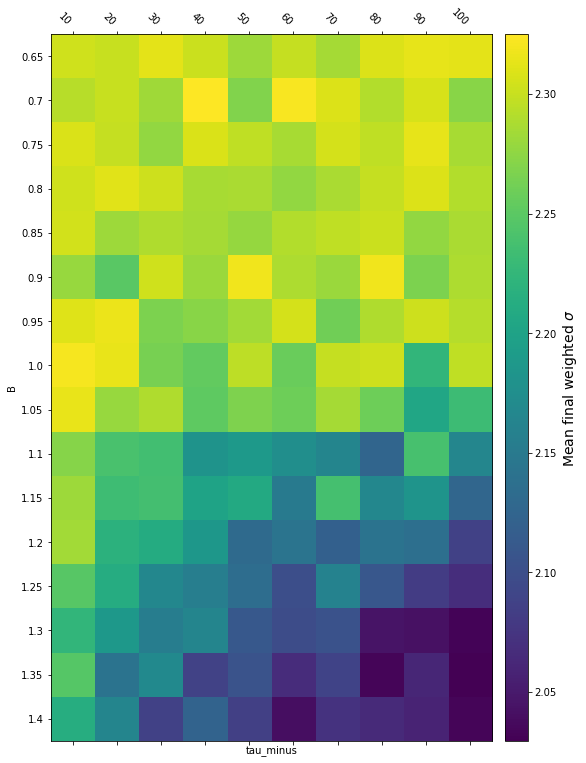

In [29]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,13))
i = ax1.matshow(fin_mean_std_weight_variation)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_xlabel("tau_minus")
ax1.set_ylabel("B")
ax1.set_xticks(range(np.arange(100, 0, -10).size))
ax1.set_xticklabels(np.arange(100, 0, -10)[::-1], rotation='-45', ha='right')
ax1.set_yticks(range(np.arange(1.4, 0.6, -0.05).size))
ax1.set_yticklabels(np.arange(1.4, 0.6, -0.05)[::-1], ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Mean final weighted $\sigma$", fontsize=14)
plt.tight_layout(.3)
f.savefig('b_vs_t_minus_fin_mean_std_weight.png')

In [30]:
fin_mean_std_weight_variation

array([[ 2.30350446,  2.30054593,  2.31307365,  2.3009327 ,  2.28221324,
         2.29867251,  2.2850405 ,  2.30936641,  2.31354249,  2.3133069 ],
       [ 2.29355954,  2.29988241,  2.28259474,  2.32493101,  2.26934578,
         2.32190865,  2.3097435 ,  2.2905591 ,  2.3067925 ,  2.2721844 ],
       [ 2.30808228,  2.29910773,  2.27656635,  2.30792408,  2.29642524,
         2.28600751,  2.30543889,  2.2972264 ,  2.31376393,  2.28645489],
       [ 2.30301652,  2.31190657,  2.30274836,  2.28659718,  2.2871899 ,
         2.27668568,  2.28770703,  2.29849215,  2.30901019,  2.29113361],
       [ 2.30521457,  2.28164067,  2.28998229,  2.28560987,  2.27811756,
         2.29073382,  2.29682318,  2.30138199,  2.27748606,  2.28702102],
       [ 2.27981283,  2.24954957,  2.30343081,  2.28081086,  2.31854972,
         2.28836072,  2.28072341,  2.31883664,  2.26672524,  2.28839816],
       [ 2.31089989,  2.31643569,  2.26706116,  2.27230762,  2.2840055 ,
         2.30595926,  2.26095823,  2.29010369

In [34]:
# Display 2 correlation matrices side by side for t_minus = 10 and for t_minus = 100

interesting_names_2 = all_names[np.where(['init' not in name and 'wsr' not in name and 'shuf' not in name for name in all_names])]
interesting_names_indices_2 = np.where(['init' not in name and 'wsr' not in name and 'shuf' not in name for name in all_names])[0]

results_with_poi_2 = np.concatenate((np.asarray(results[:, interesting_names_indices_2], dtype=float), set_of_poi), axis=1)

correlation_with_poi_t_minus_10 = scipy.stats.spearmanr(results_with_poi_2[results_with_poi_2[:,-1]==10][:,:-1])
correlation_with_poi_t_minus_100 = scipy.stats.spearmanr(results_with_poi_2[results_with_poi_2[:,-1]==100][:,:-1])

assert np.all(results_with_poi[results_with_poi[:,-1]==10][:,-1]==10)
assert np.all(results_with_poi[results_with_poi[:,-1]==100][:,-1]==100)


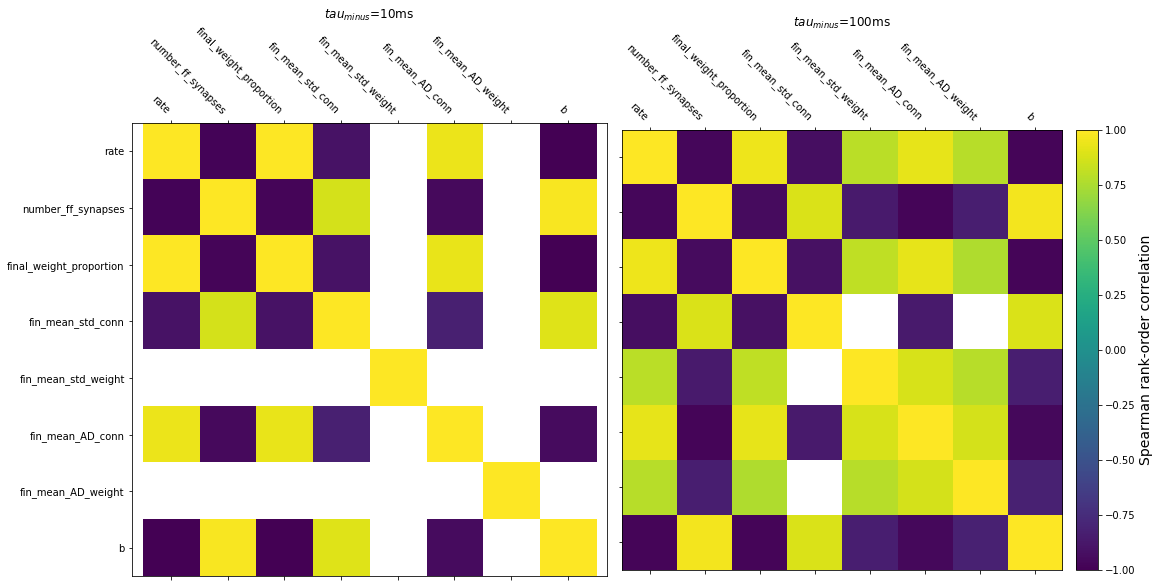

In [38]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ff_conn_ax = ax1.matshow(correlation_with_poi_t_minus_10.correlation, vmin=-1, vmax=1)
lat_conn_ax = ax2.matshow(correlation_with_poi_t_minus_100.correlation, vmin=-1, vmax=1)

ax1.set_xticks(range(results_with_poi_2.shape[1]-1))
ax1.set_xticklabels(interesting_names_2.tolist() + params_of_interest[:-1], rotation='-45', ha='right')
ax1.set_yticks(range(results_with_poi_2.shape[1]-1))
ax1.set_yticklabels(interesting_names_2.tolist() + params_of_interest[:-1], ha='right')


ax2.set_xticks(range(results_with_poi_2.shape[1]-1))
ax2.set_xticklabels(interesting_names_2.tolist() + params_of_interest[:-1], rotation='-45', ha='right')
# ax2.set_yticks(range(results_with_poi.shape[1]))
# ax2.set_yticklabels(interesting_names.tolist() + params_of_interest, ha='right')
ax1.set_title("$tau_{minus}$=10ms\n\n\n\n\n")
# ax1.set_xlabel("Neuron ID")
ax2.set_title("$tau_{minus}$=100ms\n\n\n\n\n")
# ax2.set_xlabel("Neuron ID")
# ax1.set_ylabel("Neuron ID")

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Spearman rank-order correlation", fontsize=14)
plt.tight_layout(.3)
fig_conn.savefig("correlation_matrix_comparison_t_minus_10vs100.png")

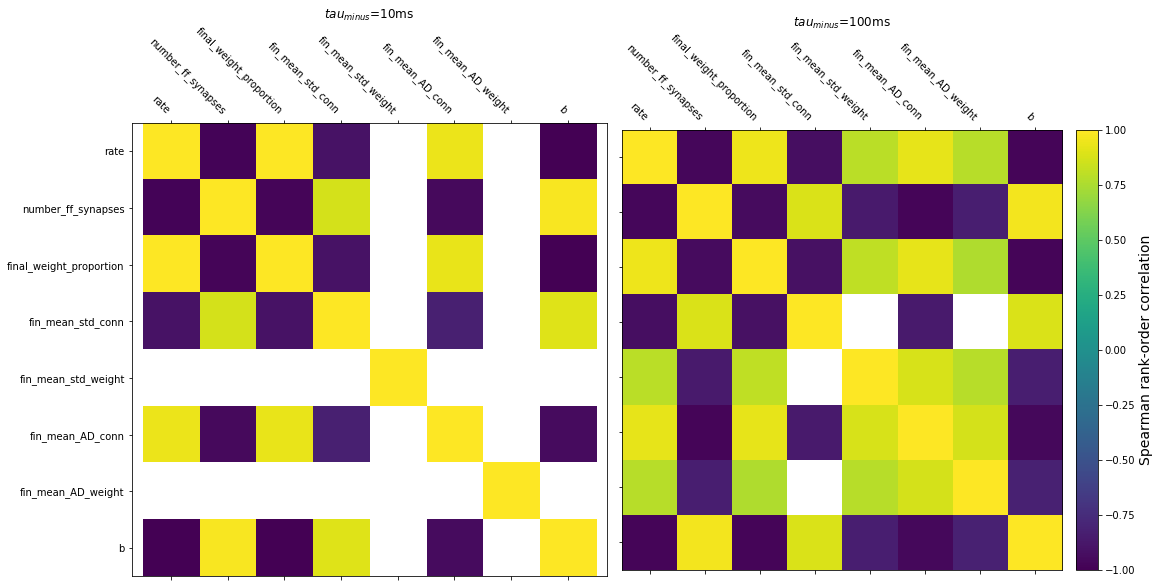

In [37]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    
significant_correlation1 = correlation_with_poi_t_minus_10.correlation
significant_correlation1[np.where(np.logical_and(significant_correlation1>-.75, significant_correlation1<.75))] = np.nan

significant_correlation2 = correlation_with_poi_t_minus_100.correlation
significant_correlation2[np.where(np.logical_and(significant_correlation2>-.75, significant_correlation2<.75))] = np.nan
    
ff_conn_ax = ax1.matshow(significant_correlation1, vmin=-1, vmax=1)
lat_conn_ax = ax2.matshow(significant_correlation2, vmin=-1, vmax=1)

ax1.set_xticks(range(results_with_poi_2.shape[1]-1))
ax1.set_xticklabels(interesting_names_2.tolist() + params_of_interest[:-1], rotation='-45', ha='right')
ax1.set_yticks(range(results_with_poi_2.shape[1]-1))
ax1.set_yticklabels(interesting_names_2.tolist() + params_of_interest[:-1], ha='right')


ax2.set_xticks(range(results_with_poi_2.shape[1]-1))
ax2.set_xticklabels(interesting_names_2.tolist() + params_of_interest[:-1], rotation='-45', ha='right')
# ax2.set_yticks(range(results_with_poi.shape[1]))
# ax2.set_yticklabels(interesting_names.tolist() + params_of_interest, ha='right')
ax1.set_title("$tau_{minus}$=10ms\n\n\n\n\n")
# ax1.set_xlabel("Neuron ID")
ax2.set_title("$tau_{minus}$=100ms\n\n\n\n\n")
# ax2.set_xlabel("Neuron ID")
# ax1.set_ylabel("Neuron ID")

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Spearman rank-order correlation", fontsize=14)
plt.tight_layout(.3)
fig_conn.savefig("correlation_matrix_comparison_t_minus_10vs100_significant.png")

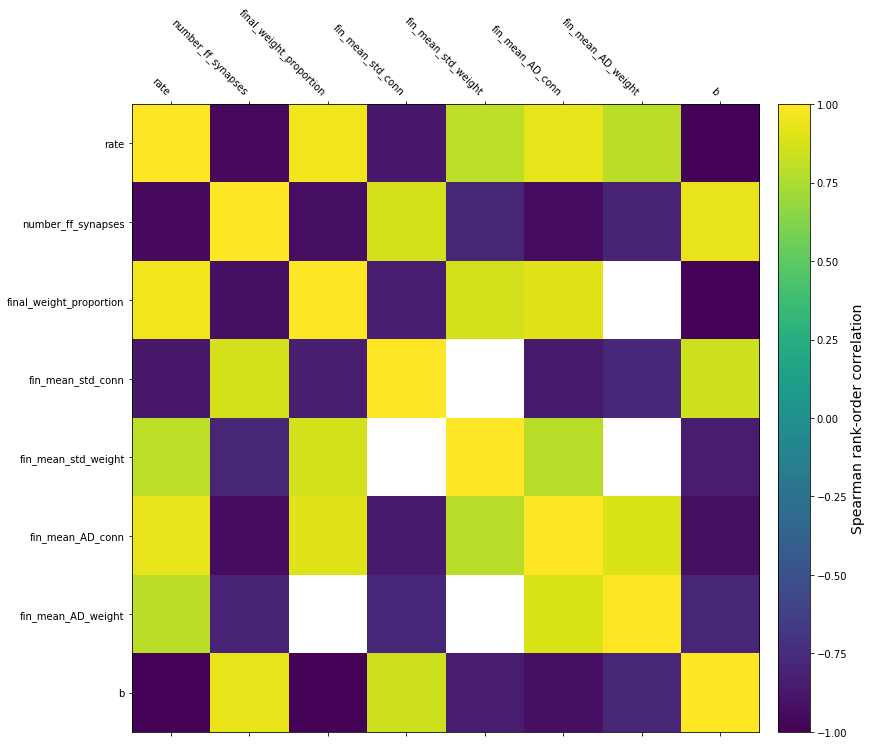

In [36]:

correlation_with_poi_no_useless_stuff = scipy.stats.spearmanr(results_with_poi_2[:,:-1])
significant_correlation = correlation_with_poi_no_useless_stuff.correlation
significant_correlation[np.where(np.logical_and(significant_correlation>-.75, significant_correlation<.75))] = np.nan

f, (ax1) = plt.subplots(1, 1 ,figsize=(12,12))
i = ax1.matshow(significant_correlation, vmin=-1, vmax=1)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
# ax1.set_xlabel("Neuron X coordinate")
# ax1.set_ylabel("Neuron Y coordinate")
ax1.set_xticks(range(results_with_poi_2.shape[1]-1))
ax1.set_xticklabels(interesting_names_2.tolist() + params_of_interest[:-1], rotation='-45', ha='right')
ax1.set_yticks(range(results_with_poi_2.shape[1]-1))
ax1.set_yticklabels(interesting_names_2.tolist() + params_of_interest[:-1], ha='right')
# ax1.set_yticklabels(interesting_names, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Spearman rank-order correlation", fontsize=14)
plt.tight_layout(.3)
f.savefig('result_matrix_correlations_significant.png')